In [30]:
import os
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

import mplfinance as mpf
import finplot as fplt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [2]:
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

# P1 - Intro & Getting stock data

In [3]:
#DataReader is not able to get yahoo data so use get_data_yahoo.
# Overrides the default behavior of the pandas_datareader library to use yfinance instead. 
# This is useful because yfinance provides a more reliable way to fetch data from Yahoo Finance.
yf.pdr_override()
df=web.get_data_yahoo("TSLA",start=start,end=end)
print(df.head(10))

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667   71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000   80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333   93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333   44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333   51637500
2015-01-09  13.928000  13.998667  13.664000  13.777333  13.777333   70024500
2015-01-12  13.536667  13.631333  13.283333  13.480667  13.480667   89254500
2015-01-13  13.554667  13.840667  13.394000  13.616667  13.616667   67159500
2015-01-14  12.388667  13.013333  12.333333  12.846000  12.846000  173278500
2015-01-15  12.966000  13.050000  12.666667  12.791333  12.791333   78247500


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,169.339996,174.500000,167.789993,172.979996,172.979996,104423300
2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400
2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600


In [5]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [6]:
df.set_index("Date", inplace=True)

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,169.339996,174.500000,167.789993,172.979996,172.979996,104423300
2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400
2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600


* Open - When the stock market opens in the morning for trading, what was the price of one share?
* High - over the course of the trading day, what was the highest value for that day?
* Low - over the course of the trading day, what was the lowest value for that day?
* Close - When the trading day was over, what was the final price?
* Volume - For that day, how many shares were traded?
* Adj Close -
    * This one is slightly more complicated, but, over time, companies may decide to do something called a stock split.
    * For example, Apple did one once their stock price exceeded $1000. 
    * Since in most cases, people cannot buy fractions of shares, a stock price of 1,000 is fairly limiting to investors. 
    * Companies can do a stock split where they say every share is now 2 shares, and the price is half.
    * Anyone who had 1 share of Apple for 1,000, after a split where Apple doubled the shares, they would have 2 shares of Apple (AAPL), each worth 500.
    * Adj Close is helpful, since it accounts for future stock splits, and gives the relative price to splits.
    * For this reason, the adjusted prices are the prices you're most likely to be dealing with.

In [8]:
yf.pdr_override()
df=web.get_data_yahoo("GOOG",start=start,end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,154.014999,156.654999,153.990005,156.139999,156.139999,16641500
2024-04-09,157.350006,159.889999,156.639999,158.139999,158.139999,21538100
2024-04-10,157.880005,158.160004,156.199997,157.660004,157.660004,16339200
2024-04-11,158.339996,161.119995,157.929993,160.789993,160.789993,17841700
2024-04-12,159.404999,161.699997,158.600006,159.190002,159.190002,16968200


# P2 - Handling data + Graphing

In [10]:
df.plot()
plt.show()

E:\miniconda\envs\tf-cpu\lib\site-packages\finplot\__init__.py:2774: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return t.view('int64')


In [11]:
df['Adj Close'].plot()

E:\miniconda\envs\tf-cpu\lib\site-packages\finplot\__init__.py:2774: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return t.view('int64')


In [12]:
df[['High','Low']].plot()

E:\miniconda\envs\tf-cpu\lib\site-packages\finplot\__init__.py:2774: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return t.view('int64')


# P3 - Basic stock data Manipulation

In [13]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268,NaN
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796,NaN
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800,NaN
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082,NaN
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641,NaN


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2024-04-08,154.014999,156.654999,153.990005,156.139999,156.139999,16641500,142.566999
2024-04-09,157.350006,159.889999,156.639999,158.139999,158.139999,21538100,142.811999
2024-04-10,157.880005,158.160004,156.199997,157.660004,157.660004,16339200,143.034299
2024-04-11,158.339996,161.119995,157.929993,160.789993,160.789993,17841700,143.278399
2024-04-12,159.404999,161.699997,158.600006,159.190002,159.190002,16968200,143.483299


In [15]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268,26.168653
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796,25.895903
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800,25.607029
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082,25.451872
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641,25.374534


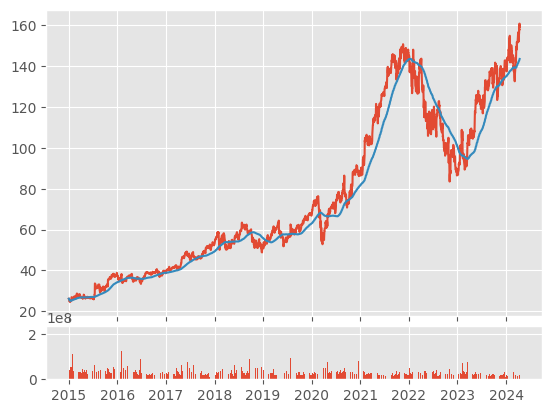

In [16]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

# P4 - More stock manipulations

* create a candlestick / OHLC graph based on the Adj Close column, 
* which will allow me to cover resampling and a few more data visualization concepts

In [17]:
import yfinance as yf
import finplot as fplt
import matplotlib.dates as mdates


mdates type that...is mostly just a pain in the butt, but that's the date type for matplotlib graphs

In [18]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()


* created a new dataframe, based on the df['Adj Close']column, resamped with a 10 day window, and the resampling is an ohlc (open high low close)
* Keep in mind, this 10 day average would be a 10 day average, not a rolling average.
* Since our data is daily data, resampling it to 10day data effectively shrinks the size of our data significantly.
* This is how you can normalize multiple datasets.
* Sometimes, you might have data that tracks once a month on the 1st of the month, other data that logs at the end of each month, and finally some data that logs weekly.
* You can resample this dataframe to the end of the month, every month, and effectively normalize it all!

In [19]:
df_volume = df['Volume'].resample('10D').sum()


In [20]:
df_ohlc = df_ohlc.reset_index()

In [21]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

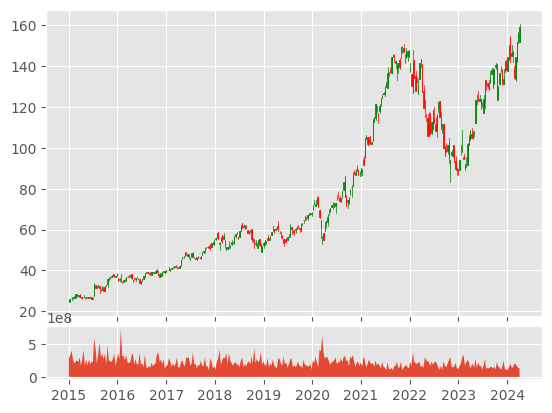

In [22]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

## Using finplot

In [20]:
# df = yf.download('SPY',start='2018-01-01', end = '2020-04-29')
# df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,242.319412,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,243.852066,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,244.879868,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,246.511765,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,246.962570,57319200


In [ ]:
# fplt.candlestick_ochl(df[['Open','Close','High','Low']])
# fplt.plot(df.Close.rolling(50).mean())
# fplt.plot(df.Close.rolling(200).mean())
# fplt.show()

E:\miniconda\envs\tf-cpu\lib\site-packages\finplot\__init__.py:2774: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return t.view('int64')
E:\miniconda\envs\tf-cpu\lib\site-packages\finplot\__init__.py:2774: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return t.view('int64')
E:\miniconda\envs\tf-cpu\lib\site-packages\finplot\__init__.py:2774: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return t.view('int64')
E:\miniconda\envs\tf-cpu\lib\site-packages\finplot\__init__.py:2788: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = ts.view('int64')


# P5 - Automating getting the S&P 500 list

In [23]:
import bs4 as bs
import pickle
import requests

In [24]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})

In [25]:
def save_sp500_tickers():
  resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs.BeautifulSoup(resp.text, 'lxml')
  table = soup.find('table', {'class': 'wikitable sortable'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.strip()
    tickers.append(ticker)

  with open('sp500tickers.pickle', 'wb') as f:
    pickle.dump(tickers, f)
  print(tickers)

In [26]:
save_sp500_tickers()

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

# P6 - Getting all company pricing data in the S&P 500

In [32]:
def get_data_yahoo(reload_sp500=False):
    
    if reload_sp500:
        tickets=save_SP500_tickers()
    else:
            with open ("sp500tickers.pickle", "rb") as f:
                tickers=pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start=dt.datetime(2020,1,1)
    end=dt.datetime(2023,12,31)
    
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            yf.pdr_override()
            df=web.get_data_yahoo(ticker,start=start,end=end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have'.format(ticker))
get_data_yahoo()   

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******